## Trabajo: Detección de anomalías

Objetivo

Aplicar e interpretar los resultados de un algoritmo de detección de anomalías (se recomienda **isolation forest**) aplicado sobre el conjunto de datos. El objetivo es clasificar la existencia de tumor o no.

Primero realicemos las importaciones de las librerias necesarias:

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  #para dividir nuestro dataset
from sklearn.feature_selection import SelectKBest   # nos sirve para encontrar las mejores variables
from sklearn.feature_selection import chi2  
from sklearn.ensemble import IsolationForest   #para crear nuestro modelo
from sklearn import metrics                    #para realizar las metricas
from sklearn.metrics import confusion_matrix   #para realizar las metricas

In [216]:
url = 'C:/Archivos/cancer/data.csv'
data = pd.read_csv(url)

Veamos la cabecera de nuestro dataset y empecemos a indagar sobre nuestros datos

In [217]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [218]:
#vemos que casi todos nuestros datos, son float menos la columna diagnosis que sera utilizada como clase
data.dtypes
data.shape

(569, 33)

Durante el carge de los datos se creo la columna 'Unnamed: 32' vamos a eliminarla.


In [219]:
#Borramos la primera columna id y la ultima 'Unnamed: 32' 
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

#### Cambio de valores categoricos a numericos: 

Vamos a cambian los valores categoricos de la case 'diagnosis' por valores numericos

In [220]:
diag_map = {'M':-1, 'B':1} #los valores 1 y -1 han sido elegidos pensando en el resultado de IsolationForest
data['diagnosis'] = data['diagnosis'].map(diag_map)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         -1        17.99         10.38          122.80     1001.0   
1         -1        20.57         17.77          132.90     1326.0   
2         -1        19.69         21.25          130.00     1203.0   
3         -1        11.42         20.38           77.58      386.1   
4         -1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

In [36]:
#ahora todos nuestros valores son numericos
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Como podemos ver no existen valores, faltantes en los datos:

In [37]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Realicemos la separación de nuestros datos:

1. vamos a separar los datos en "X" y 'y'
2. vamos a usar train_test_split para realizar la separacion de los datos en entrenamiento y pruebas

In [212]:
# realizamos la separación de los datos
etiquetas = data.columns #separamos los nombres de las columnas
y = data.diagnosis #en y solo colocamos la columna diagnosis 
x = data[etiquetas[1:]]

Numero de Benigno  357
Numero of Maligno :  212


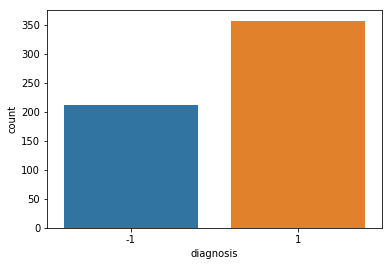

In [211]:
ax = sns.countplot(y,label="Count")       # vemos la distribucion de diagnosis:
B, M = y.value_counts()
print('Numero de Benigno ',B)
print('Numero of Maligno : ',M)

Veamos el **mapa de correlación** que tiene nuestros datos, con ello sabremos que variables estan mas correlacionadas con otras,
y podremos elegir las mejores. 


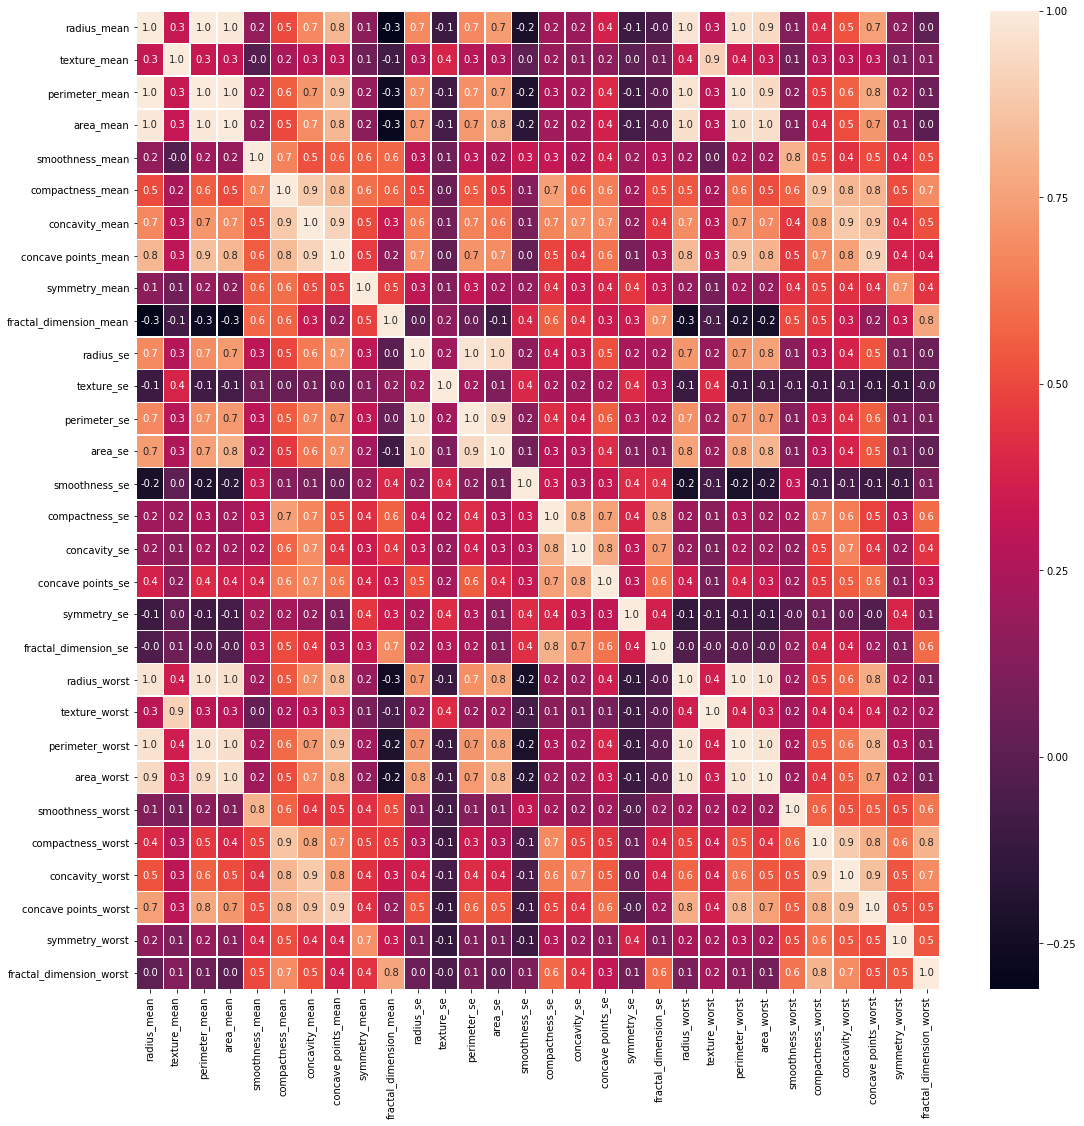

In [41]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### Separacion de los test de pruebas y entrenamiento

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Eleccion de las mejores variables 

Para nuestro modelo, para ello vamos a utilizar el metodo "SelectKBest" de "sklearn.feature_selection" con la finalidad que nos ayude a determinar las mejores variables:

Vemos que el algoritmo nos sugiere las siguientes 15 variables, marcadas como True, el valor de 15 fue terminado a base de prueba y error. 
    

In [210]:
X_select = SelectKBest(chi2, k=15).fit(x_train, y_train)
d = {'feature': x_train.columns, 'Valor': X_select.get_support()}
variables = pd.DataFrame(data=d)
variable= variables.loc[variables['Valor'] == True]
feature = variable['feature']
variable

feature  Valor
0            radius_mean   True
1           texture_mean   True
2         perimeter_mean   True
3              area_mean   True
6         concavity_mean   True
10             radius_se   True
12          perimeter_se   True
13               area_se   True
20          radius_worst   True
21         texture_worst   True
22       perimeter_worst   True
23            area_worst   True
25     compactness_worst   True
26       concavity_worst   True
27  concave points_worst   True

Nuevamente realizamos la división de los datos teniendo en cuenta, las mejores variables arrojadas por **SelectKBest**

In [202]:
xc = x[feature]
x_trainc, x_testc, y_trainc, y_testc = train_test_split(xc, y, test_size=0.2, random_state=42)
print('conjunto prueba: ', x_testc.shape)
print('conjunto entrenamiento: ', x_trainc.shape)
print('conjunto labels prueba: ', y_testc.shape)
print('conjunto labels entrenamiento: ', y_trainc.shape)


conjunto prueba:  (114, 15)
conjunto entrenamiento:  (455, 15)
conjunto labels prueba:  (114,)
conjunto labels entrenamiento:  (455,)


### Estableciendo el valor de la contaminación:

Ya que contamos con un dataset completo en el cual tenemos los valores de la clase objetivo, podemos establecer en valor de la contaminación que sera uno de los parametros para nuestro modelo:


**Nota:** se define el porcentaje de contaminación como el numero de anomalias en el conjunto de datos. 

Numero de Benignos:  286
Numero de Malignos :  169
Total:  455
Porcentaje contaminacion:  0.37142857142857144


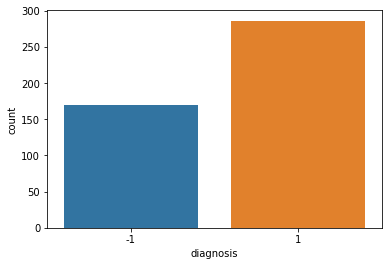

In [209]:
ax = sns.countplot(y_trainc,label="Count")       # vemos la distribucion de diagnosis:
B, M = y_trainc.value_counts()
print('Numero de Benignos: ',B)
print('Numero de Malignos : ',M)
print('Total: ', y_trainc.count())
print('Porcentaje contaminacion: ', M/y_trainc.count())

### Entrenando el modelo

Vamos a entrenar el modelo y realizar predicciones, para ello utilizaremos los datos previamente separados x_trainc para entrenamiento y x_testc para las predicciones: 

In [204]:
rng = np.random.RandomState(42)
ifo =  IsolationForest(max_samples='auto', n_estimators=100, contamination=0.37,random_state=rng) #colocamos la contaminacion
modelo = ifo.fit(x_trainc)  #realizamos el entrenamiento de nuestro modelo
predic = modelo.predict(x_testc) # realizamos las predicciones


C:\Users\dicue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### Metricas: 

Para medir la efectividad de nuestro modelo vamos a utilizar la matrix de confusion y el valor de accuracy o exactitud que nos proporciona sklearn.metrics:

**Matris de confusion**

In [208]:
confusion_matrix(y_testc, predic) 


array([[30, 13],
       [10, 61]], dtype=int64)

Viendo la matriz de confusion nos damos cuenta que la mayoria de los resultados caen en la horizontal lo cual es un excelente pronostico para nuestro modelo:

Tenemos 10 falsos negativos y 13 falsos positivos

**Valor de exactitud:**

In [207]:
print("Accuracy:",metrics.accuracy_score(y_testc, predic))

Accuracy: 0.7982456140350878


El valor de accuracy es **80%** lo cual indica que nuestro modelo tiene una muy buena calificación. 

**Conclusiones:**

- La utilización 'grid search' para tunear los Metaparametros no arrojo mejores resultados.
- El encontrar los mejores variables con SelectKBest mejora los porcentajes de exactitud, el valor de 15 fue determinado por medio de múltiples pruebas con diferentes valores; donde 15 fue el óptimo. 
- El valor de contaminación también hace que nuestro modelo arroje mejores resultados.


**Bibliografía:**

- http://sdsawtelle.github.io/blog/output/week9-anomaly-andrew-ng-machine-learning-with-python.html

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest